# NLP - Emotion Classification

### 1. Loading and Preprocessing

In [10]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv("nlp_dataset.csv")
df.head()

,Comment,Emotion
0,i seriously hate one subject to death but now ...,fear
1,im so full of life i feel appalled,anger
2,i sit here to write i start to dig out my feel...,fear
3,ive been really angry with r and i feel like a...,joy
4,i feel suspicious if there is no one outside l...,fear


In [23]:
df.tail()

,Comment,Emotion
5932,i begun to feel distressed for you,fear
5933,i left feeling annoyed and angry thinking that...,anger
5934,i were to ever get married i d have everything...,joy
5935,i feel reluctant in applying there because i w...,fear
5936,i just wanted to apologize to you because i fe...,anger


In [24]:
df.size

11874

In [25]:
df.shape

(5937, 2)

In [26]:
df.columns

Index(['Comment', 'Emotion'], dtype='object')

In [27]:
df.describe(include='all')

,Comment,Emotion
count,5937,5937
unique,5934,3
top,i feel like a tortured artist when i talk to her,anger
freq,2,2000


In [28]:
df.isnull().sum()

Comment    0
Emotion    0
dtype: int64

In [29]:
df.duplicated().sum()

0

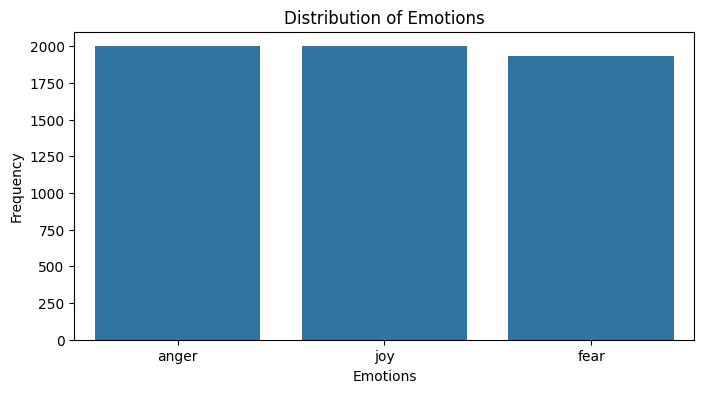

In [11]:
plt.figure(figsize=(8, 4))
sns.countplot(x='Emotion', data=df, order=df['Emotion'].value_counts().index)
plt.title('Distribution of Emotions')
plt.xlabel('Emotions')
plt.ylabel('Frequency')
plt.show()

The above bar chart shows the frequency of three emotions: anger, joy, and fear. And the data driven from this is

Anger and Joy: Both emotions have a similar frequency, close to 2000.

Fear: This emotion is slightly less frequent, with a count abo7e 1500.

In [17]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

In [32]:
   # nltk.download('stopwords')
   #  nltk.download('punkt')
nltk.download('punkt_tab')
def clean_text(text):    # Text cleaning function
    text = text.lower()  
    text = re.sub(r'\b\w{1,2}\b', '', text)  # to remove short words
    text = re.sub(r'[^\w\s]', '', text)  # to remove punctuation
    return text

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


In [15]:
df['Cleaned_Comment'] = df['Comment'].apply(clean_text)  # Apply text cleaning

df[['Comment', 'Cleaned_Comment']]  # Display the cleaned comments

,Comment,Cleaned_Comment
0,i seriously hate one subject to death but now ...,seriously hate one subject death but now fe...
1,im so full of life i feel appalled,full life feel appalled
2,i sit here to write i start to dig out my feel...,sit here write start dig out feelings and...
3,ive been really angry with r and i feel like a...,ive been really angry with and feel like id...
4,i feel suspicious if there is no one outside l...,feel suspicious there one outside like the...
...,...,...
5932,i begun to feel distressed for you,begun feel distressed for you
5933,i left feeling annoyed and angry thinking that...,left feeling annoyed and angry thinking that ...
5934,i were to ever get married i d have everything...,were ever get married have everything read...
5935,i feel reluctant in applying there because i w...,feel reluctant applying there because want ...


In [29]:
# Tokenization and stopword removal
stop_words = set(stopwords.words('english'))

In [30]:
def tokenize_and_remove_stopwords(text):
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

In [33]:
df['Processed_Comment'] = df['Cleaned_Comment'].apply(tokenize_and_remove_stopwords)

In [34]:
df['Processed_Comment'] 

0       seriously hate one subject death feel reluctan...
1                                 full life feel appalled
2       sit write start dig feelings think afraid acce...
3       ive really angry feel like idiot trusting firs...
4       feel suspicious one outside like rapture happe...
                              ...                        
5932                                begun feel distressed
5933    left feeling annoyed angry thinking center stu...
5934    ever get married everything ready offer got to...
5935    feel reluctant applying want able find company...
5936           wanted apologize feel like heartless bitch
Name: Processed_Comment, Length: 5937, dtype: object

In [35]:
df[['Comment', 'Processed_Comment']]   # Display the processed dataframe

,Comment,Processed_Comment
0,i seriously hate one subject to death but now ...,seriously hate one subject death feel reluctan...
1,im so full of life i feel appalled,full life feel appalled
2,i sit here to write i start to dig out my feel...,sit write start dig feelings think afraid acce...
3,ive been really angry with r and i feel like a...,ive really angry feel like idiot trusting firs...
4,i feel suspicious if there is no one outside l...,feel suspicious one outside like rapture happe...
...,...,...
5932,i begun to feel distressed for you,begun feel distressed
5933,i left feeling annoyed and angry thinking that...,left feeling annoyed angry thinking center stu...
5934,i were to ever get married i d have everything...,ever get married everything ready offer got to...
5935,i feel reluctant in applying there because i w...,feel reluctant applying want able find company...


## Preprocessing Techniques Used and Their Impact on Model Performance 
### LowercasingHere it converts all characters to lowercase for Standardizing the text, reducing the number of unique words (e.g., "Hello" and "hello" become the same) thus Improves efficiency by ensuring different cases of the same word are treated equally.  ng on more informative words

### Removal of Short Words
Here it removes words that are one or two characters long because short words often carry less meaningful information thereby reducing noise, focusing on more informative words, enhancing model performance.

### Removal of Punctuation
Here it removes punctuation marks because Punctuation usually doesn't carry significant meaning in text analysis and thus Simplifying text, leading to better feature extraction.

### Tokenization and Stopword Removal
Here it splits text into individual words (tokens) and removes common stopwords (e.g., "the", "is").Tokenization breaks down text into manageable pieces, while stopwords often carry little semantic information thereby reduces dimensionality and noise, focusing on more informative words.

## 2. Feature Extraction

In [36]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer()    # Initialize CountVectorizer

X_count = count_vectorizer.fit_transform(df['Cleaned_Comment'])   # Fit and transform the text data

X_count_df = pd.DataFrame(X_count.toarray(), columns=count_vectorizer.get_feature_names_out())# Convert the result to a DataFrame for better readability

print(X_count_df.head())   # Display the first few rows of the feature matrix

   aac  aaron  abandon  abandoned  abandonment  abbigail  abc  abdomen  \
0    0      0        0          0            0         0    0        0   
1    0      0        0          0            0         0    0        0   
2    0      0        0          0            0         0    0        0   
3    0      0        0          0            0         0    0        0   
4    0      0        0          0            0         0    0        0   

   abelard  abide  ...  zen  zendikar  zero  zest  zhu  zipline  zombies  \
0        0      0  ...    0         0     0     0    0        0        0   
1        0      0  ...    0         0     0     0    0        0        0   
2        0      0  ...    0         0     0     0    0        0        0   
3        0      0  ...    0         0     0     0    0        0        0   
4        0      0  ...    0         0     0     0    0        0        0   

   zone  zonisamide  zumba  
0     0           0      0  
1     0           0      0  
2     0    

CountVectorizer creates a matrix of token counts for each document. 

It tokenizes the text and counts the occurrences of each word. Each row in the resulting matrix corresponds to a document, and each column corresponds to a unique word in the corpus. The cell values represent the count of each word in the respective document.

This method transforms text into a numerical format where the frequency of each word is represented. While straightforward, it doesn’t account for the relative importance of words across documents or handle synonyms and word variations well.

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()

X_tfidf = tfidf_vectorizer.fit_transform(df['Cleaned_Comment'])

X_tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())# Convert the result to a DataFrame for better readability

print(X_tfidf_df.head())   # Display the first few rows of the feature matrix

   aac  aaron  abandon  abandoned  abandonment  abbigail  abc  abdomen  \
0  0.0    0.0      0.0        0.0          0.0       0.0  0.0      0.0   
1  0.0    0.0      0.0        0.0          0.0       0.0  0.0      0.0   
2  0.0    0.0      0.0        0.0          0.0       0.0  0.0      0.0   
3  0.0    0.0      0.0        0.0          0.0       0.0  0.0      0.0   
4  0.0    0.0      0.0        0.0          0.0       0.0  0.0      0.0   

   abelard  abide  ...  zen  zendikar  zero  zest  zhu  zipline  zombies  \
0      0.0    0.0  ...  0.0       0.0   0.0   0.0  0.0      0.0      0.0   
1      0.0    0.0  ...  0.0       0.0   0.0   0.0  0.0      0.0      0.0   
2      0.0    0.0  ...  0.0       0.0   0.0   0.0  0.0      0.0      0.0   
3      0.0    0.0  ...  0.0       0.0   0.0   0.0  0.0      0.0      0.0   
4      0.0    0.0  ...  0.0       0.0   0.0   0.0  0.0      0.0      0.0   

   zone  zonisamide  zumba  
0   0.0         0.0    0.0  
1   0.0         0.0    0.0  
2   0.0    

TfidfVectorizer calculates a matrix where each word is weighted based on its term frequency (how often it appears in a document) and inverse document frequency (how common it is across all documents).

It first counts the occurrences of each word (like CountVectorizer) but then applies a weighting formula. The formula decreases the weight of common words and increases the weight of rare words, providing a measure of word importance in each document.

## 3. Model Development

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [39]:
vectorizer = TfidfVectorizer()  # Initialize TfidfVectorizer

In [40]:
X = vectorizer.fit_transform(df['Cleaned_Comment'])  # Transform the text data
y = df['Emotion']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  # Split the data into training and test sets

 ### a)Naive Bayes

In [42]:
nb_model = MultinomialNB()  # Initialize Naive Bayes model

nb_model.fit(X_train, y_train)  # Train the model

MultinomialNB()

In [43]:
nb_predictions = nb_model.predict(X_test)   # Predict on the test set

In [44]:
nb_accuracy = accuracy_score(y_test, nb_predictions)  # Evaluate the model
nb_report = classification_report(y_test, nb_predictions)

In [45]:
print("Accuracy:", nb_accuracy)
print("Naive Bayes Model")

Accuracy: 0.8945005611672279
Naive Bayes Model


In [46]:
print("Classification Report:\n", nb_report)

Classification Report:
               precision    recall  f1-score   support

       anger       0.87      0.93      0.90       600
        fear       0.92      0.86      0.89       614
         joy       0.89      0.89      0.89       568

    accuracy                           0.89      1782
   macro avg       0.90      0.89      0.89      1782
weighted avg       0.90      0.89      0.89      1782



### b)SVM model

In [47]:
svm_model = SVC()   # Initialize SVM model

svm_model.fit(X_train, y_train)  # Train the model

SVC()

In [48]:
svm_predictions = svm_model.predict(X_test)  # Predict on the test set

In [49]:
svm_accuracy = accuracy_score(y_test, svm_predictions)  # Evaluate the model
svm_report = classification_report(y_test, svm_predictions)

In [50]:
print("Support Vector Machine Model")
print("Accuracy:", svm_accuracy)

Support Vector Machine Model
Accuracy: 0.8984287317620651


In [51]:
print("Classification Report:\n", svm_report)

Classification Report:
               precision    recall  f1-score   support

       anger       0.91      0.89      0.90       600
        fear       0.95      0.85      0.90       614
         joy       0.84      0.96      0.90       568

    accuracy                           0.90      1782
   macro avg       0.90      0.90      0.90      1782
weighted avg       0.90      0.90      0.90      1782



Model Comparison, we use the following metrics:

Accuracy F1-Score Metrics and Comparison Accuracy

Naive Bayes Model: 89.45% SVM Model: 89.84% 
Explanation: Accuracy measures the proportion of correctly classified instances out of the total instances. The SVM model has a slightly higher accuracy, indicating it classifies a marginally higher percentage of instances correctly compared to the Naive Bayes model.

F1-Score

Naive Bayes Model:

Anger: 0.90 Fear: 0.89 Joy: 0.89 Macro Average: 0.89 Weighted Average: 0.89 SVM Model:

Anger: 0.90 Fear: 0.90 Joy: 0.90 Macro Average: 0.90 Weighted Average: 0.90 
Explanation: The F1-Score balances precision and recall, providing a single metric to evaluate model performance. The SVM model has a slightly better F1-Score across all classes and averages compared to Naive Bayes, indicating it has a more balanced performance in terms of precision and recall.